In [1]:
import pandas as pd
import seaborn as sns
import os
import analysis


In [2]:
analyser = analysis.Analyser("k6")
all_data = analyser.get_data()
all_data


loading from ../bench/k6
processing a76ea53a3d1059e42d846046e838a7ea9045f226a92a9acfc0bee676fab38c91
processing 2646dfd817d566e943ec5b9a1adf123fad36e7eb0326041954e98000666c7a02


/home/t-ajeffery/projects/lskv/.venv/lib/python3.8/site-packages/IPython/lib/pretty.py:778: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/t-ajeffery/projects/lskv/.venv/lib/python3.8/site-packages/IPython/core/formatters.py:343: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,metric_name,metric_value,check,error,error_code,expected_response,group,method,name,proto,...,port,tls,sgx,nodes,worker_threads,sig_tx_interval,sig_ms_interval,ledger_chunk_bytes,snapshot_tx_interval,http_version
0,http_reqs,1.000000,NaN,NaN,NaN,True,NaN,POST,https://127.0.0.1:8000/v3/kv/put,HTTP/2.0,...,8000,True,False,1,0,5000,100,20KB,10,2
1,http_req_duration,44.120116,NaN,NaN,NaN,True,NaN,POST,https://127.0.0.1:8000/v3/kv/put,HTTP/2.0,...,8000,True,False,1,0,5000,100,20KB,10,2
2,http_req_blocked,21.963385,NaN,NaN,NaN,True,NaN,POST,https://127.0.0.1:8000/v3/kv/put,HTTP/2.0,...,8000,True,False,1,0,5000,100,20KB,10,2
3,http_req_connecting,0.104059,NaN,NaN,NaN,True,NaN,POST,https://127.0.0.1:8000/v3/kv/put,HTTP/2.0,...,8000,True,False,1,0,5000,100,20KB,10,2
4,http_req_tls_handshaking,21.749784,NaN,NaN,NaN,True,NaN,POST,https://127.0.0.1:8000/v3/kv/put,HTTP/2.0,...,8000,True,False,1,0,5000,100,20KB,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122825,checks,1.000000,status is 200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8000,True,False,1,0,5000,100,20KB,10,1
122826,data_sent,201.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8000,True,False,1,0,5000,100,20KB,10,1
122827,data_received,205.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8000,True,False,1,0,5000,100,20KB,10,1
122828,iteration_duration,1.196693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8000,True,False,1,0,5000,100,20KB,10,1


In [10]:
req_duration_data = all_data[all_data["metric_name"] == "http_req_duration"]
req_duration_data.columns

Index(['metric_name', 'metric_value', 'check', 'error', 'error_code',
       'expected_response', 'group', 'method', 'name', 'proto', 'scenario',
       'service', 'status', 'subproto', 'tls_version', 'url', 'extra_tags',
       'metadata', 'start_ms', 'end_ms', 'latency_ms', 'store', 'port', 'tls',
       'sgx', 'nodes', 'worker_threads', 'sig_tx_interval', 'sig_ms_interval',
       'ledger_chunk_bytes', 'snapshot_tx_interval', 'http_version'],
      dtype='object')

In [4]:
ignore_vars = [
    "metric_name",
    "metric_value",
    "service",
    "subproto",
    "proto",
    "scenario",
    "status",
    "tls_version",
    "url",
    "name",
    "extra_tags",
    "metadata",
    "check",
    "error",
    "error_code",
    "expected_response",
    "group",
    "method",
]


/home/t-ajeffery/projects/lskv/benchmark/analysis.py:348: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  variant_column = pd.Series()


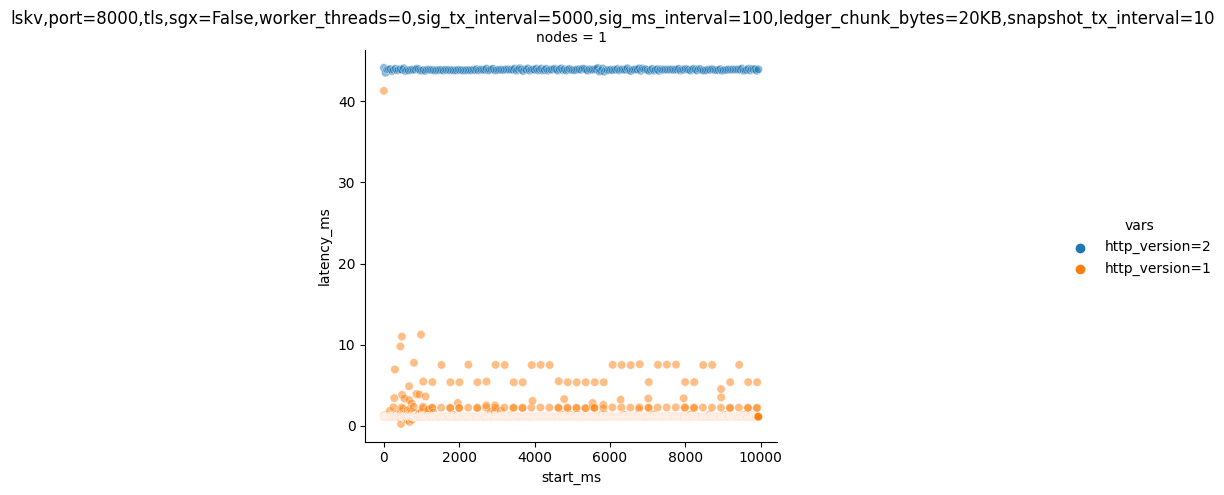

In [12]:
plot_data = req_duration_data.copy(deep=False)
analyser.plot_scatter(plot_data, col="nodes", ignore_vars=ignore_vars)


/home/t-ajeffery/projects/lskv/benchmark/analysis.py:348: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  variant_column = pd.Series()


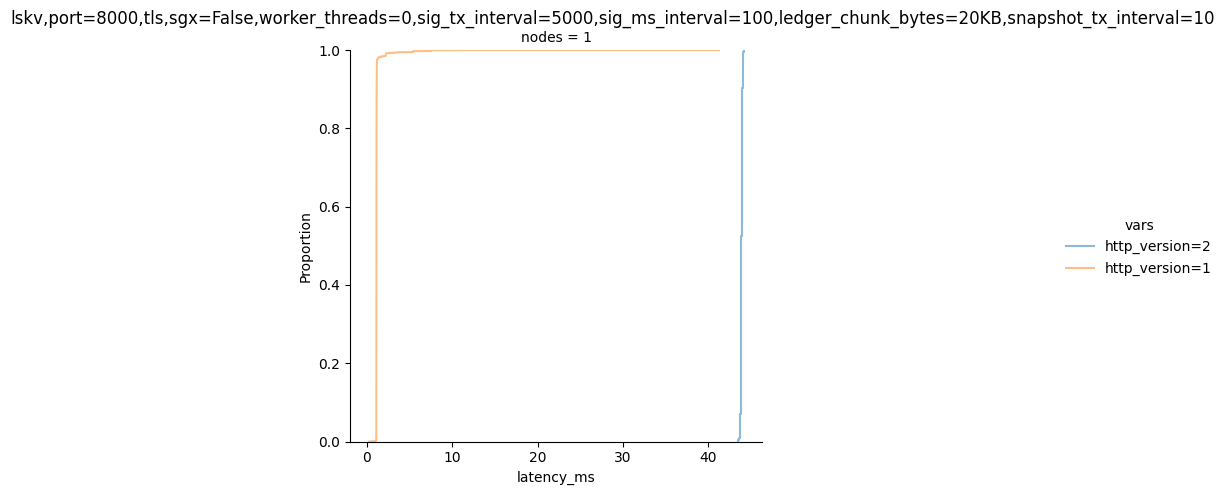

In [11]:
plot_data = req_duration_data.copy(deep=False)
analyser.plot_ecdf(plot_data, col="nodes", ignore_vars=ignore_vars)
